## Import Necessary Modules

In [1]:
#env.close()
#one_env.close()

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import time
import torch
from collections import deque
import matplotlib.pyplot as plt
import ddpg_agent
from ddpg_agent import Agent as Agency
from ddpg_agent import SEED, BUFFER_SIZE, BATCH_SIZE, device
#from ddpg_train import train
print("Using device:", device)
%matplotlib inline

Using device: cuda:0


## Unity Reacher Environment

## Examine the State and Action Spaces

In [3]:
# For Environment with 20 Agents:
env = UnityEnvironment(file_name='UnityReacher20\Reacher.exe',  #'../data/Reacher1_Win/Reacher.exe',   # 
                       worker_id=200, 
                       seed=SEED, 
                       no_graphics=False)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33


## DDPG

#### Intialize the Agent

In [4]:
agency = Agency(state_size=state_size, 
                action_size=action_size, 
                num_agents=num_agents, 
                random_seed=SEED,
                actor_units_in=256,
                actor_units_hid=128,
                critic_units_in=512,
                critic_units_hid=128,
                actor_filename='checkpoints/actor_training_chkpnt60.pth',
                critic_filename='checkpoints/critic_training_chkpnt60.pth')

In [26]:
agemembuff = agency.memory
new_agency = Agency(
                state_size=state_size, 
                action_size=action_size, 
                num_agents=num_agents, 
                random_seed=SEED,
                actor_units_in=256,
                actor_units_hid=128,
                critic_units_in=512,
                critic_units_hid=128,
                actor_filename='checkpoints/actor_training_chkpnt20.pth', 
                critic_filename='checkpoints/critic_training_chkpnt40.pth')
new_agency.memory = agemembuff

In [27]:
new_agency.memory.sample()

(tensor([[-2.3189, -3.2616, -0.1260,  ...,  1.0000,  0.0000,  0.8967],
         [-2.8133, -2.2166,  1.8010,  ...,  1.0000,  0.0000, -0.2315],
         [-1.6966, -3.4761,  1.0319,  ...,  1.0000,  0.0000, -0.9994],
         ...,
         [ 1.7679, -3.0136,  1.9576,  ...,  1.0000,  0.0000,  0.1579],
         [-3.1249, -2.4712, -0.4365,  ...,  1.0000,  0.0000, -0.8832],
         [ 2.2964, -2.8342, -1.6574,  ...,  1.0000,  0.0000,  0.9642]],
        device='cuda:0'),
 tensor([[ 0.4851, -0.6685, -0.0778,  0.3775],
         [-1.0000,  0.1614,  0.1993, -0.2576],
         [-0.4477, -0.9367, -0.8535, -0.9253],
         [ 0.2288, -0.0385,  0.2306, -0.7333],
         [ 0.4650, -0.0714,  0.4095,  0.2005],
         [ 1.0000, -1.0000, -0.7354,  0.6631],
         [ 1.0000, -0.9030, -0.4023,  0.3287],
         [-0.2562, -0.4932,  0.0310, -0.2300],
         [-0.5675, -0.8898,  1.0000,  1.0000],
         [ 0.0441,  0.6256, -0.1842,  0.0894],
         [-0.2652,  1.0000, -0.1489, -0.7557],
         [ 1.000

#### Random Agent Play

In [28]:
rapisodes = 3
for rap in range(rapisodes):
    env_info = env.reset(train_mode=False)[brain_name]         # reset the environment    
    rap_states = env_info.vector_observations                  # get the current state (for each agent)
    rap_scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    rap_steps = 111
    for rep in range(rap_steps):
    #    rap_actions = np.random.randn(num_agents, action_size)     # select an action (for each agent)
    #    rap_actions = np.clip(rap_actions, -1, 1)                  # all actions between -1 and 1
        rap_actions, rap_noises = agency.act(rap_states, return_noise=True)
        env_info = env.step(rap_actions)[brain_name]           # send all actions to tne environment
        rap_next_states = env_info.vector_observations         # get next state (for each agent)
        rap_rewards = env_info.rewards                         # get reward (for each agent)
        rap_dones = env_info.local_done                        # see if episode finished
        rap_scores += env_info.rewards                         # update the score (for each agent)
        rap_states = rap_next_states                           # roll over states to next time step
        #print("\rTotal cumulative score (averaged over all agents) these {:3d} steps: {:7.3f}\n".format(rep, np.mean(rap_scores)))
        print("\r{:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f}".format(*rap_scores), end='')
        if np.any(rap_dones):                                  # exit loop if episode finished
            break
    #print("\n{:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f}".format(*rap_scores))
    print("\nAverage score over all 20 agents and the last {} learnable steps: {:7.3f}".format(rap_steps, np.mean(rap_scores)))

2.67 | 4.00 | 3.98 | 3.98 | 3.40 | 4.05 | 4.03 | 4.05 | 4.01 | 4.04 | 4.05 | 3.83 | 3.95 | 3.91 | 4.02 | 3.91 | 4.01 | 3.97 | 4.00 | 4.02
Average score over all 20 agents and the last 111 learnable steps:   3.894
4.09 | 3.96 | 4.09 | 3.62 | 3.90 | 4.02 | 4.07 | 4.03 | 3.98 | 3.96 | 3.73 | 4.06 | 4.07 | 3.99 | 4.01 | 3.95 | 4.08 | 3.99 | 4.03 | 4.10
Average score over all 20 agents and the last 111 learnable steps:   3.986
4.00 | 3.96 | 4.02 | 3.97 | 4.05 | 3.97 | 4.05 | 3.99 | 4.00 | 3.96 | 3.97 | 3.93 | 4.01 | 3.88 | 3.80 | 4.02 | 3.99 | 3.97 | 3.96 | 4.07
Average score over all 20 agents and the last 111 learnable steps:   3.978


### Train

In [29]:
import time
#from ddpg_agent import *

def train(env, agency, n_episodes=2000, max_t=1000, hiscore=30):
    """Deep Q-Learning for a Continuous Action Space
    
    Params
    ======
        env (environment): Here, a Unity Env. Originally, a Gym(nasium) env
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        hiscore (int): the metric score to achieve to solve the env 
    """
    start = time.time()
    episode_times = []; episode_lengths = []; scores = []; agent_scores = []
    action_steps = []; noise_steps= []; actor_loss = []; critic_loss = []
    scores_window = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        epistart = time.time()
        score = 0. ; episteps = 0.; episcores = np.zeros(agency.num_agents)
        a_loss = 0. ; c_loss = 0.
        env_info = env.reset(train_mode=True)['ReacherBrain']
        states = env_info.vector_observations
        agency.reset()
        for t in range(max_t):
            actions, noises = agency.act(states, return_noise=True)
            action_steps.append(actions)
            noise_steps.append(noises)
            actions = np.clip(actions+noises, -1, 1)
            env_info = env.step(actions)['ReacherBrain']
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            al, cl = agency.step(states, actions, rewards, next_states, dones, return_loss=True)
            if al != None: 
                a_loss += al; c_loss += cl; 
            states = next_states; episteps+=1
            score += np.mean(rewards); episcores += rewards
            if np.any(dones):
                break  
        # Data appendage
        scores_window.append(score)       
        scores.append(score)
        episode_lengths.append(episteps)
        actor_loss.append(a_loss/episteps)          
        critic_loss.append(c_loss/episteps)
        episode_times.append(time.time()-epistart)
        cycle_steps = agency.steps%BUFFER_SIZE
        buffer_cycle = agency.steps//BUFFER_SIZE

        print("\rEpisode {:4d} | Score: {:8.2f} | Actor Loss: {:8.2f} | Critic Loss: {:8.2f} | Average: {:5d} Steps in {:5.3f} sec | Memory Buffer:{:7d} into cycle {:3d}".format(
                                        i_episode,
                                        score, actor_loss[-1], critic_loss[-1],
                                        int(episteps), time.time()-epistart,
                                        cycle_steps, buffer_cycle), end="")
        #print("\r{:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f}".format(*individual_scores), end="")
                                                                                                                                        
        if i_episode % 10 == 0:
            chkpntname = "checkpoints/actor_chkpnt{}.pth".format(i_episode)
            torch.save(agency.fast_actor.state_dict(), chkpntname)  
            chkpntname = "checkpoints/critic_chkpnt{}.pth".format(i_episode)
            torch.save(agency.fast_critic.state_dict(), chkpntname) 
            print("\rEpisode {:4d} | Score: {:8.2f} | Actor Loss: {:8.2f} | Critic Loss: {:8.2f} | Average: {:5d} Steps in {:5.3f} sec | Memory Buffer:{:7d} into cycle {:3d}".format(
                                        i_episode, 
                                        np.mean(scores_window), np.mean(actor_loss), np.mean(critic_loss),
                                        int(np.round(np.mean(episode_lengths))), np.mean(episode_times),
                                        cycle_steps, buffer_cycle))
        #print("\r{:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f}".format(*individual_scores))
        
        if np.mean(scores_window)>=hiscore:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:5.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agency.fast_actor.state_dict(), 'checkpoints/actor_slvdpnt.pth')
            torch.save(agency.fast_critic.state_dict(), 'checkpoints/critic_slvdpnt.pth')
            break
            
    t_time = time.time() - start
    print("Total time: {:3d} minutes {:4.2f} seconds \tAvg. Episode time: {:5.3f} seconds \tAvg. Episode steps: {:5.3f}".format(int(
            t_time//60),
            t_time%60,
            t_time/i_episode,
            agency.steps/i_episode))
    
    return scores, episode_lengths, episode_times, action_steps, noise_steps, actor_loss, critic_loss

In [21]:

scores, episode_lengths, episode_times, action_steps, noise_steps, actor_loss, critic_loss = train(env, new_agency, n_episodes=20, max_t=400, hiscore=33)

Episode   10 | Score:    14.83 | Actor Loss:    -2.31 | Critic Loss:     0.00 | Average: 400.0 Steps in 5.156 sec | Memory Buffer: 608000 into cycle   0
Episode   20 | Score:    14.88 | Actor Loss:    -2.35 | Critic Loss:     0.00 | Average: 400.0 Steps in 5.200 sec | Memory Buffer: 688000 into cycle   0
Total time:   1 minutes 44.01 seconds 	Avg. Episode time: 5.201 seconds 	Avg. Episode steps: 34400.000


In [30]:
############### import and Train with loss and noise collected
n_episodes=200
max_t=1001
print('\r### Episodes: {}\tTime Limit: {:.2f} ###'.format(n_episodes, max_t))
new_scores, new_els, new_ets, new_as, new_ns, new_al, new_cl = train(env, new_agency, n_episodes, max_t, hiscore=33)
try:
    scores += new_scores ; episode_lengths += new_els ; episode_times += new_ets ; action_steps += new_as ; noise_steps+=new_ns ; actor_loss += new_al ; critic_loss += new_cl
except:
    scores = new_scores ; episode_lengths = new_els ; episode_times = new_ets ; action_steps = new_as ; noise_steps = new_ns ; actor_loss = new_al ; critic_loss = new_cl

### Episodes: 200	Time Limit: 1001.00 ###
Episode   10 | Score:    20.84 | Actor Loss:    -1.07 | Critic Loss:     0.00 | Average: 1001.0 Steps in 14.860 sec | Memory Buffer: 200200 into cycle   0
Episode   20 | Score:    29.62 | Actor Loss:    -1.26 | Critic Loss:     0.00 | Average: 1001.0 Steps in 15.661 sec | Memory Buffer: 400400 into cycle   0
Episode   30 | Score:    32.58 | Actor Loss:    -1.44 | Critic Loss:     0.00 | Average: 1001.0 Steps in 16.408 sec | Memory Buffer: 600600 into cycle   0
Episode   33 | Score:    38.15 | Actor Loss:    -2.04 | Critic Loss:     0.00 | Average: 1001 Steps in 18.180 sec | Memory Buffer: 660660 into cycle   0
Environment solved in -67 episodes!	Average Score: 33.09
Total time:   9 minutes 7.58 seconds 	Avg. Episode time: 16.593 seconds 	Avg. Episode steps: 20020.000


In [34]:
noise_steps[-2], action_steps[-2], noise_steps[-2] + action_steps[-2]

(array([[-0.10315025, -0.11538596,  0.24034703, -0.40579664],
        [ 0.68717949,  0.36316028, -0.25292701,  0.92996039],
        [-0.20207494, -0.23506958,  0.11658915, -0.15447941],
        [-0.27374019,  0.07822219,  0.07304374,  0.31153692],
        [ 0.31771925, -1.04301392,  0.01273255, -0.03675583],
        [-0.204526  , -0.03359422,  0.2028703 , -0.55562252],
        [ 0.11545115, -0.06138617,  0.49934915, -0.35176294],
        [-0.41407389, -0.22499499,  0.0461911 ,  0.13429254],
        [-0.48284497,  0.13496894,  0.35822824, -0.06251971],
        [ 0.34178109,  0.70259053,  0.13196168,  0.17633476],
        [ 0.23219802,  0.00435628, -0.18387529, -0.07305168],
        [ 0.29572118, -0.81703505, -0.3140536 ,  0.3438374 ],
        [-0.49099325, -0.89312001,  0.34397768,  0.4906701 ],
        [-0.10267421,  0.4316444 ,  0.26733916, -0.70209248],
        [-0.66111101,  0.45922269,  0.06497996, -0.65953411],
        [-0.19146905, -0.23959989, -0.21589022,  0.11882251],
        

### Change of setting

In [ ]:
def ddpg(n_episodes=500):
    start = time.time()
    episode_times = []
    episode_lengths = []
    scores_deque = deque(maxlen=100)
    scores = []
    agent_scores = []
    for i_episode in (range(1, n_episodes+1)):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agency.reset()
        score = 0.
        individual_scores = np.zeros(num_agents)
        episteps = 1
        epistart = time.time()
        while True:
            action = agency.act(state)      #action, noise = agency.act(state, return_noise=True)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agency.step(state, action, reward, next_state, done)
            state = next_state
            score += np.mean(reward)
            individual_scores += reward
            if np.any(done):
                break 
            episteps+=1
        episode_times.append(time.time()-epistart)
        episode_lengths.append(episteps)
        scores_deque.append(score)
        scores.append(score)
        agent_scores.append(individual_scores)
        cycle_steps = agency.steps%ddpg_agent.BUFFER_SIZE
        buffer_cycle = agency.steps//ddpg_agent.BUFFER_SIZE
        
        print('\rEps{:5d}  Reward: {:8.2f}\tAvg Reward: {:8.2f}\tEps Time: {:6.3f} sec\tBuffer Cycle: {:3d} rem {:7d}'.format(
                i_episode, 
                score, 
                np.mean(scores_deque),
                episode_times[-1],
                buffer_cycle,
                cycle_steps), end="")

        if i_episode % 20 == 0:
            chkpntname = "checkpoints/actor_training_chkpnt{:d}.pth".format(i_episode)
            torch.save(agency.actor_local.state_dict(), chkpntname)  
            chkpntname = "checkpoints/critic_training_chkpnt{:d}.pth".format(i_episode)
            torch.save(agency.critic_local.state_dict(), chkpntname)
        
        if i_episode % 10 == 0:
            print('\rEps{:5d}\tReward: {:8.2f}\tAvg Reward: {:8.2f}\t Avg Eps Time: {:6.3f} sec\tBuffer Cycle: {:3d} rem {:7d}'.format(
                    i_episode,
                    score,
                    np.mean(scores_deque),
                    np.mean(episode_times),
                    buffer_cycle,
                    cycle_steps))
            print("{:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f} | {:4.2f}".format(*individual_scores))

        if np.mean(scores_deque)>=30:
            print('\nScore averaged over 100 episodes and 20 Agents stably above metric of 30.\nEnvironment officially solved at episode {:d}!\tAverage Reward: {:6.2f}'.format(
                    i_episode-100, 
                    np.mean(scores_deque)))
            torch.save(agency.actor_local.state_dict(), 'checkpoints/slvdpnt_actor.pth')
            torch.save(agency.critic_local.state_dict(), 'checkpoints/slvdpnt_critic.pth')
            break

    torch.save(agency.actor_local.state_dict(), "checkpoints/actor_trained.pth")
    torch.save(agency.critic_local.state_dict(), "checkpoints/critic_trained.pth") 
    print('\nFINAL\nEpisode{:5d}\tReward: {:8.2f}\tAverage Reward: {:8.2f}\tBuffer Cycle: {:3d} rem {:7d}'.format(
            i_episode,
            score,
            np.mean(scores_deque),
            buffer_cycle,
            cycle_steps))
    
    t_time = time.time() - start
    print("Total time: {:3d} minutes {:4.2f} seconds \t Avg. Episode time: {:5.3f} seconds \t Avg. Steps per Episode: {:5.1f}".format(
           int(t_time//60),
           t_time%60,
           t_time/i_episode,
           round(np.mean(episode_lengths))))
    
    return scores, agent_scores, episode_times

In [ ]:
### TRAIN AGENTS
sc, ag, et = ddpg(n_episodes=40)
try:
    scores+=sc
    agent_scores+=ag
    episode_times+=et
except:
    scores=sc
    agent_scores=ag
    episode_times=et


#### Best Config

`CriticA(fcs1_units=512, fc2_units=128)`

* BUFFER_SIZE = int(5.12e5)  # replay buffer size
* BATCH_SIZE = 128        # minibatch size
* GAMMA = 0.99            # discount factor
* TAU = 1e-3              # for soft update of target parameters
* LR_ACTOR = 1e-4         # learning rate of the actor 
* LR_CRITIC = 1e-4        # learning rate of the critic
* WEIGHT_DECAY = 0.       # L2 weight decay

> * Episode   10	Reward:   1.00	Average Reward:   0.61	Buffer Cycle:  0 mod 200200
> * Episode   20	Reward:   4.11	Average Reward:   1.58	Buffer Cycle:  0 mod 400400
> * Episode   30	Reward:   8.67	Average Reward:   3.15	Buffer Cycle:  1 mod  88600
> * Episode   40	Reward:  17.64	Average Reward:   5.44	Buffer Cycle:  1 mod 288800
> * Episode   50	Reward:  28.35	Average Reward:   8.99	Buffer Cycle:  1 mod 489000
> * Episode   60	Reward:  33.21	Average Reward:  12.81	Buffer Cycle:  2 mod 177200
> * Episode   70	Reward:  35.12	Average Reward:  15.97	Buffer Cycle:  2 mod 377400
> * Episode   80	Reward:  35.23	Average Reward:  18.44	Buffer Cycle:  3 mod  65600
> * Episode   90	Reward:  36.47	Average Reward:  20.42	Buffer Cycle:  3 mod 265800
> * Episode  100	Reward:  36.46	Average Reward:  21.97	Buffer Cycle:  3 mod 466000
> * Episode  110	Reward:  36.44	Average Reward:  25.54	Buffer Cycle:  4 mod 154200
> * Episode  120	Reward:  35.09	Average Reward:  28.90	Buffer Cycle:  4 mod 354400
> * Episode  124	Reward:  36.91	Average Reward:  30.16	Buffer Cycle:  4 mod 434480

**Solved**

Environment officially solved at episode 24	Average Reward:  30.16

---

Eps   10	Reward:    15.95	Avg Reward:    24.20	 Avg Eps Time: 10.485 sec	Buffer Cycle:   0 mod   10010
Eps   20	Reward:    22.38	Avg Reward:    21.96	 Avg Eps Time: 10.786 sec	Buffer Cycle:   0 mod   20020
Eps   30	Reward:    18.91	Avg Reward:    21.33	 Avg Eps Time: 10.768 sec	Buffer Cycle:   0 mod   30030
Eps   40	Reward:    27.72	Avg Reward:    22.27	 Avg Eps Time: 10.752 sec	Buffer Cycle:   0 mod   40040
Eps   50	Reward:    28.59	Avg Reward:    22.33	 Avg Eps Time: 10.750 sec	Buffer Cycle:   0 mod   50050
Eps   60	Reward:    20.83	Avg Reward:    21.82	 Avg Eps Time: 10.794 sec	Buffer Cycle:   0 mod   60060
Eps   70	Reward:    20.66	Avg Reward:    21.67	 Avg Eps Time: 10.781 sec	Buffer Cycle:   0 mod   70070
Eps   80	Reward:    30.70	Avg Reward:    22.39	 Avg Eps Time: 10.777 sec	Buffer Cycle:   0 mod   80080
Eps   90	Reward:    26.80	Avg Reward:    22.80	 Avg Eps Time: 10.781 sec	Buffer Cycle:   0 mod   90090
Eps  100	Reward:    17.80	Avg Reward:    22.86	 Avg Eps Time: 10.789 sec	Buffer Cycle:   0 mod  100100
Eps  110	Reward:    23.14	Avg Reward:    22.99	 Avg Eps Time: 10.840 sec	Buffer Cycle:   0 mod  110110
Eps  120	Reward:    27.44	Avg Reward:    23.50	 Avg Eps Time: 10.841 sec	Buffer Cycle:   0 mod  120120
Eps  130	Reward:    17.93	Avg Reward:    23.65	 Avg Eps Time: 10.844 sec	Buffer Cycle:   0 mod  130130
Eps  140	Reward:    16.29	Avg Reward:    23.19	 Avg Eps Time: 10.869 sec	Buffer Cycle:   0 mod  140140
Eps  150	Reward:    19.08	Avg Reward:    22.79	 Avg Eps Time: 10.874 sec	Buffer Cycle:   0 mod  150150
Eps  160	Reward:    26.10	Avg Reward:    23.10	 Avg Eps Time: 10.883 sec	Buffer Cycle:   0 mod  160160
Eps  170	Reward:    29.94	Avg Reward:    23.26	 Avg Eps Time: 10.891 sec	Buffer Cycle:   0 mod  170170
Eps  180	Reward:    18.89	Avg Reward:    22.73	 Avg Eps Time: 10.899 sec	Buffer Cycle:   0 mod  180180
Eps  190	Reward:    26.30	Avg Reward:    22.30	 Avg Eps Time: 10.908 sec	Buffer Cycle:   0 mod  190190
Eps  200	Reward:    33.29	Avg Reward:    22.80	 Avg Eps Time: 10.942 sec	Buffer Cycle:   0 mod  200200
Eps  210	Reward:    28.95	Avg Reward:    22.81	 Avg Eps Time: 10.951 sec	Buffer Cycle:   0 mod  210210
Eps  220	Reward:    33.37	Avg Reward:    22.99	 Avg Eps Time: 10.975 sec	Buffer Cycle:   0 mod  220220
Eps  230	Reward:    22.64	Avg Reward:    23.86	 Avg Eps Time: 10.983 sec	Buffer Cycle:   0 mod  230230
Eps  240	Reward:    31.39	Avg Reward:    25.10	 Avg Eps Time: 10.998 sec	Buffer Cycle:   0 mod  240240
Eps  250	Reward:    32.45	Avg Reward:    26.21	 Avg Eps Time: 11.007 sec	Buffer Cycle:   0 mod  250250
Eps  260	Reward:    23.49	Avg Reward:    26.93	 Avg Eps Time: 11.019 sec	Buffer Cycle:   0 mod  260260
Eps  270	Reward:    21.00	Avg Reward:    27.56	 Avg Eps Time: 11.030 sec	Buffer Cycle:   0 mod  270270
Eps  280	Reward:    30.22	Avg Reward:    28.44	 Avg Eps Time: 11.050 sec	Buffer Cycle:   0 mod  280280
Eps  290	Reward:    31.85	Avg Reward:    29.35	 Avg Eps Time: 11.070 sec	Buffer Cycle:   0 mod  290290
Eps  300	Reward:    34.63	Avg Reward:    29.40	 Avg Eps Time: 11.088 sec	Buffer Cycle:   0 mod  300300
Eps  309	Reward:    36.09	Avg Reward:    30.10	Eps Time: 11.354 sec	Buffer Cycle:   0 mod  309309
Score averaged over 100 episodes and 1 Agent stably above metric of 30.
Environment officially solved at episode 209!	Average Reward:  30.10

FINAL
Episode  309	Reward:    36.09	Average Reward:    30.10	Buffer Cycle:   0 mod  309309
Total time:  57 minutes 9.14 seconds 	 Avg. Episode time: 11.098 seconds 	 Avg. Steps per Episode: 1001.0

##### Restart

In [ ]:
#torch.save(agency.actor_local.state_dict(), 'trained_actor_1.pth')
#torch.save(agency.critic_local.state_dict(), 'trained_critic_1.pth')

In [ ]:
try: 
    env.close()
    print("Closed the active environment.")
except:
    print("No active environment detected.")

In [ ]:
if True:
    # For Environment with ONE Agent:
    one_env = UnityEnvironment(file_name='../data/Reacher1_Win/Reacher.exe',   # 'UnityReacher20\Reacher.exe',  #
                           worker_id=10, 
                           seed=SEED, 
                           no_graphics=False)

    # get the default brain
    one_brain_name = one_env.brain_names[0]
    one_brain = one_env.brains[one_brain_name]

    # reset the environment
    one_env_info = one_env.reset(train_mode=True)[one_brain_name]

    # size of each action
    one_action_size = one_brain.vector_action_space_size
    print('Size of each action:', one_action_size)

    # examine the state space 
    one_state = one_env_info.vector_observations
    one_state_size = one_state.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(one_state.shape[0], one_state_size))


#### Results

NameError: name 'agent_scores' is not defined

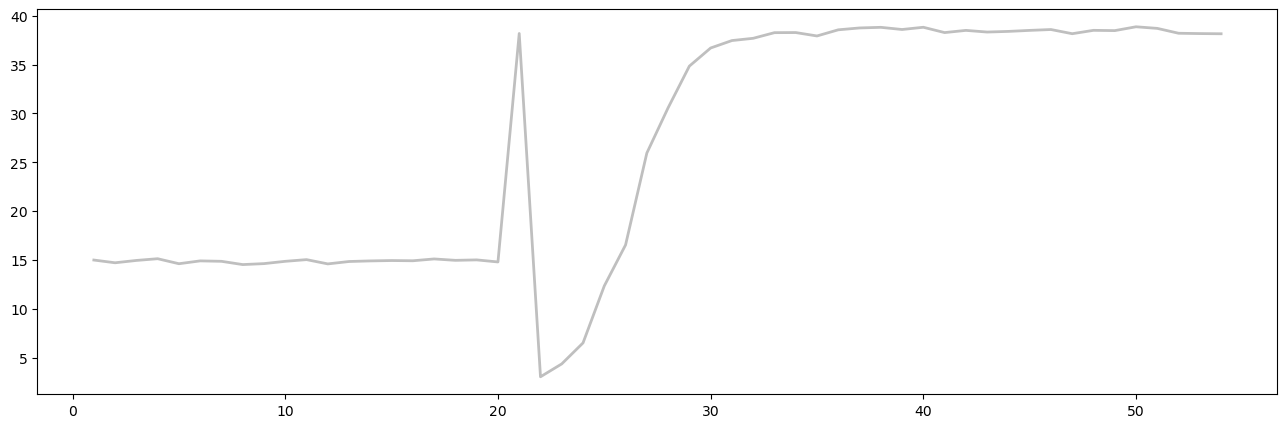

In [31]:
## Learning Curve
scores
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(np.arange(1, len(scores)+1), scores, c='#000', alpha=0.25, linewidth=2.0, label='Mean Rewards for 20 Agents')
for i in range(1,20):
    ax.plot(np.arange(1, len(agent_scores)+1), [s[i] for s in agent_scores], alpha=0.5, linewidth=0.8)
ax.plot(np.arange(1, len(scores)+1), scores, c='#000', alpha=1.0, linewidth=0.75)
plt.legend()
ax.set_xlabel('Episode #', fontsize=14)
ax.set_ylabel('Reward', fontsize=14)
ax.set_title('Reacher_20 Environment solved (30+ avg)', fontsize=14)
plt.show()

In [32]:
# Actions + noises curves
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(np.arange(1, len(scores)+1), scores, color='r', label='Mean Reward across 20 Agents')
for i in range(20):
    ax.plot(np.arange(1, len(scores)+1), [s[i] for s in agent_scores], alpha=0.1)
plt.legend()
ax.set_xlabel('Episode #', fontsize=14)
ax.set_ylabel('Reward', fontsize=14)
ax.set_title('Unity Reacher Environment using DDPG', fontsize=16)
plt.show()

NameError: name 'actions' is not defined

In [ ]:
### Run some test runs...
for _ in range(1):    
    env_info = env.reset(train_mode=False)[brain_name]        # reset the environment   
    tr_states = env_info.vector_observations                  # get the current state (for each agent)
    tr_scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        tr_actions = agency.act(tr_states, add_noise=False)   # select an action (for each agent)
        env_info = env.step(tr_actions)[brain_name]           # send all actions to tne environment
        tr_next_states = env_info.vector_observations         # get next state (for each agent)
        #tr_rewards = env_info.rewards                         # get reward (for each agent)
        tr_dones = env_info.local_done                        # see if episode finished
        tr_scores += env_info.rewards                         # update the score (for each agent)
        tr_states = tr_next_states                            # roll over states to next time step
        if np.any(tr_dones):                                  # exit loop if episode finished
            print(np.round(tr_scores, 3), end='\n')
            break
        print(np.round(tr_scores, 3), end='')        
    print('Total score (averaged over {} agents) this episode: {:3.6f}'.format(num_agents, np.mean(tr_scores)))

#env.close()

In [ ]:
agent_scores, scores

When finished, you can close the environment.

In [ ]:
env.close()

# Evaluation

In [ ]:
### Close and Restart
try: 
    env.close()
    print("Closed the active environment.")
except:
    print("No active environment detected.")
    
if True: # restart_bool
    from unityagents import UnityEnvironment
    import numpy as np
    import random
    import torch
    from collections import deque
    import matplotlib.pyplot as plt
    import ddpg_agent
    from ddpg_agent import Agent as Agency
    from ddpg_agent import SEED, BUFFER_SIZE, BATCH_SIZE, device
    print("Using device:", device)
    %matplotlib inline    
    
print("Starting new Reacher environment...")    
#env = UnityEnvironment(file_name='UnityReacher20\Reacher.exe', worker_id=111, seed=SEED, no_graphics=False)
env = UnityEnvironment(file_name='../data/Reacher1_Win/Reacher.exe', worker_id=1, seed=SEED, no_graphics=False)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
#print('The state for the first agent looks like:', states[0])

In [ ]:
#!dir checkpoints
chkpnt=100
chkpnt_name = "checkpoints/actor_training_chkpnt{}.pth".format(chkpnt)
agent.actor_local.load_state_dict(torch.load(chkpnt_name))
chkpnt_name = "checkpoints/critic_training_chkpnt{}.pth".format(chkpnt)
agent.critic_local.load_state_dict(torch.load(chkpnt_name))

In [ ]:
for chkpnt in [20,80,120]:  #range(100,1000,300):
#for agent in enumerate(agents): actor_training_chkpnt40.pth   
    chkpnt_name = "checkpoints/actor_training_chkpnt{}.pth".format(chkpnt)
    agent.actor_local.load_state_dict(torch.load(chkpnt_name))
    chkpnt_name = "checkpoints/critic_training_chkpnt{}.pth".format(chkpnt)
    agent.critic_local.load_state_dict(torch.load(chkpnt_name))
    for run in range(2):
        score = 0
        env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = agent.act(states, add_noise=False)      # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print(run+1, scores)

In [ ]:
actor_local_params = [p for p in agent.actor_local.parameters()]
actor_target_params = [p for p in agent.actor_target.parameters()]
#print(actor_local_params[-1])
#print(actor_target_params[-1])
for x, y in zip(agent.actor_local.parameters(), agent.actor_target.parameters()):
    print("Shape", x.shape, "  Equal", sum(x==y))

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for run in range(5):
    actions = agent.act(states, add_noise=False)      # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
    print(run+1, scores)

#### Post-Training Trials

In [ ]:
#### Configuration One WITHOUT NOISE ####
## Check Point: 40
## Add Noise: False

agent = Agency(state_size=state_size, 
                action_size=action_size, 
                num_agents=1, 
                random_seed=SEED,
                actor_units_in=256,
                actor_units_hid=128,
                critic_units_in=512,
                critic_units_hid=128, 
                actor_filename='checkpoints/actor_training_chkpnt40.pth', 
                critic_filename='checkpoints/critic_training_chkpnt40.pth')

env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for _ in range(3):
    actions = agent.act(states, add_noise=False)      # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [ ]:
#### Configuration Two WITH NOISE ####
## Check Point: 80
## Add Noise: True

agency = Agency(state_size=state_size, 
                action_size=action_size, 
                num_agents=num_agents, 
                random_seed=SEED,
                actor_units_in=256,
                actor_units_hid=128,
                critic_units_in=512,
                critic_units_hid=128, 
                actor_filename='checkpoints/actor_training_chkpnt80.pth', 
                critic_filename='checkpoints/critic_training_chkpnt80.pth')

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for _ in range(3):
    actions = agency.act(states, add_noise=True)       # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### WANDB

In [ ]:
import wandb
wandb.login()

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="reacher v1",
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "critic_model": "Critic",
    "actor_model": "Actor",
    "episodes": 1000,
    "max_t": 1000
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

## Configuration X

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states, add_noise=False)       # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

## Close Env

In [ ]:
env.close()